# Identification
Please indicate your name

Student 1: Andrei Aralov

Student 2: Andrea Cosentino

# Practical work 4: Frequency filtering, color

In [111]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift, ifftshift
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import ifftshift


def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercise 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

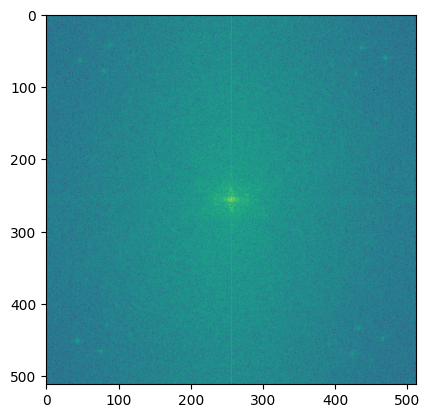

In [112]:
def toVisualizeFT(If):
    return np.abs(fftshift(If))

img = np.asarray(Image.open('img/mandrill.png'))
img_ft = fftshift(np.fft.fft2(img))
plt.imshow(np.log(1 + np.abs(img_ft)))
plt.show()

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

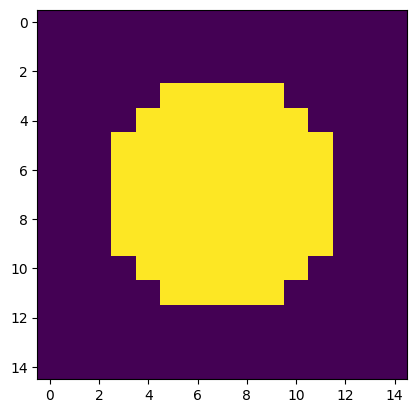

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [113]:
def idealLowPassFilter(n, m, fc):
    r = np.zeros((n, m))
    c1 = n // 2
    c2 = m // 2
    for i in range(n):
        for j in range(m):
            if np.sqrt((c1 - i)**2 + (c2 - j)**2) < fc:
                r[i, j] = 1 
    return r


f = idealLowPassFilter(15, 15, 5)
plt.imshow(f)
plt.show()
print(f)

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [114]:
def lowPass(img, fc):
    ft = fftshift(fft2(img))
    ftf = ft * idealLowPassFilter(ft.shape[0], ft.shape[1], fc)
    ft = ifftshift(ftf)
    return ifft2(ft).real

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


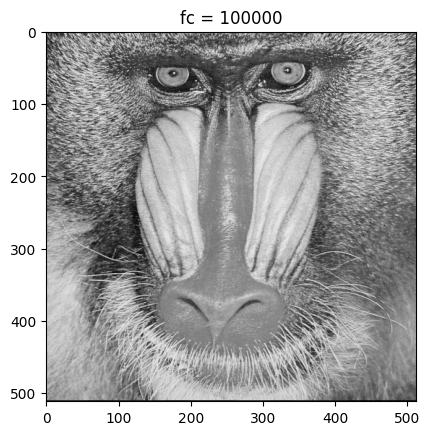

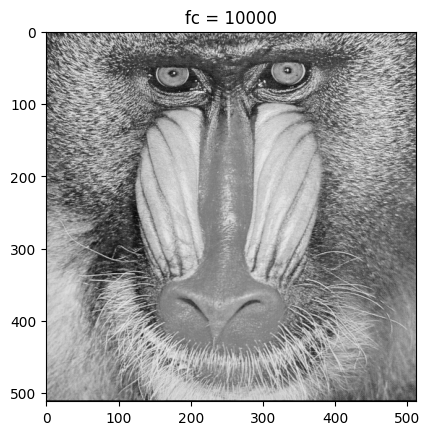

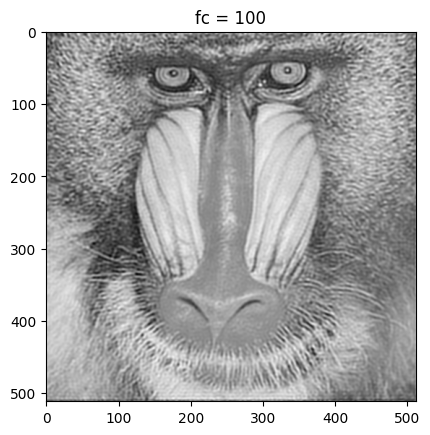

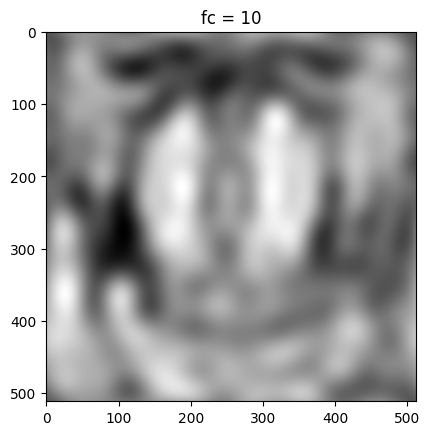

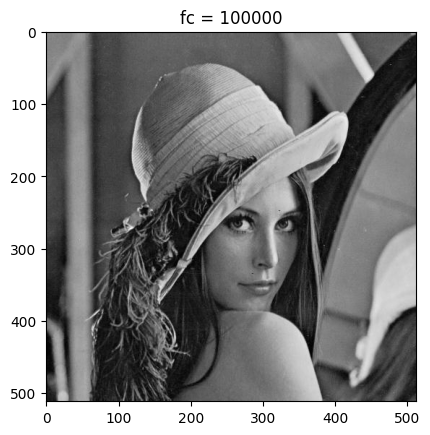

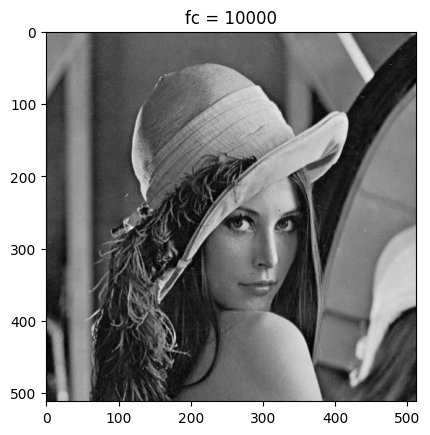

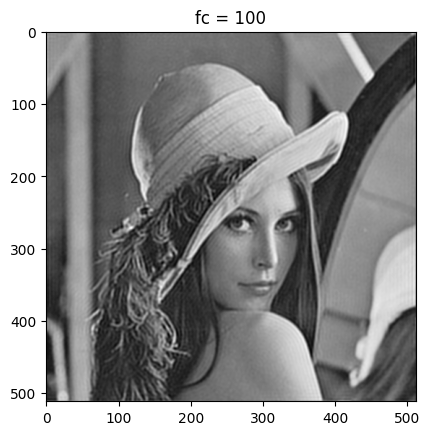

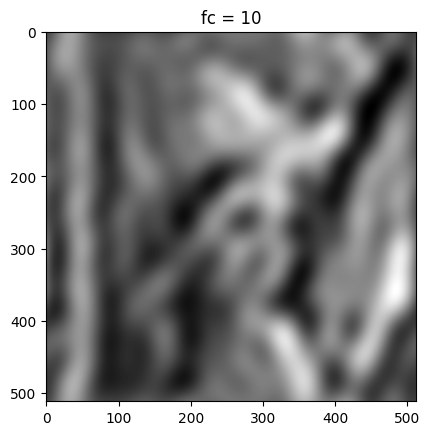

In [116]:
def showfilteredImage(img):
    for fc in [100000, 10000, 100, 10]:    
        filt = lowPass(img, fc)
        plt.imshow(filt, cmap='grey')
        plt.title(f'fc = {fc}')
        plt.show()
    
showfilteredImage(img)

img_lena = np.asarray(Image.open('img/lena.jpg'))
showfilteredImage(img_lena)

## Exercise 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

**Answer**: $\frac{d - 1}{2}$ on each side

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


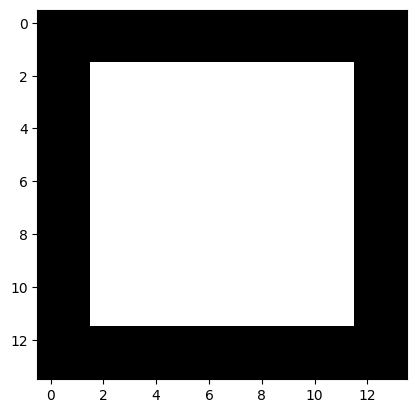

In [61]:
def imagePad(img, h):
    c0 = h.shape[0] - 1
    c1 = h.shape[1] - 1
    r = np.zeros((img.shape[0] + c0, img.shape[1] + c1))
    r[c0 // 2 : -c0 // 2, c1 // 2 : -c1 // 2] = img
    return r

padded_sample = imagePad(np.ones((10, 10)), np.ones((5, 5)))
print(padded_sample)
plt.imshow(padded_sample, cmap='grey')
plt.show()

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [92]:
def conv2(img, h):
    h12 = h.shape[0] // 2
    h22 = h.shape[1] // 2
    c1 = ( h.shape[0] - 1 ) // 2
    c2 = ( h.shape[1] - 1 ) // 2
    res = np.zeros_like(img)
    h = h[::-1, ::-1]
    img_pad = imagePad(img, h)
    for n in range(1, img.shape[0] + 1):
        for m in range(1, img.shape[1] + 1):
            for i in range(-h12, h12 + 1):
                for j in range(-h22, h22 + 1):
                    x = h[i + c1, j + c2]
                    res[n - 1, m - 1] += img_pad[n + i, m + j] * x                    
    return res


s = np.zeros((3, 3))
s[0, 0] = 1
s[0, 1] = 2
s[0, 2] = 3
s[1, 0] = 4
s[1, 1] = 5
s[1, 2] = 6
s[2, 0] = 7
s[2, 1] = 8
s[2, 2] = 9

h = np.zeros((3, 3))
h[0, 0] = 1
h[1, 0] = 1
h[2, 0] = 1
h[0, 2] = -1
h[1, 2] = -1
h[2, 2] = -1

print(s)

s_conv = conv2(s, h)
print(s_conv)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[  7.   4.  -7.]
 [ 15.   6. -15.]
 [ 13.   4. -13.]]


4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

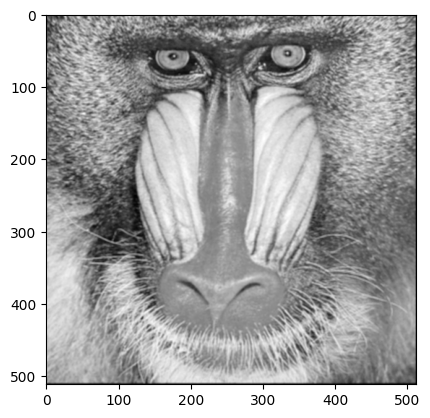

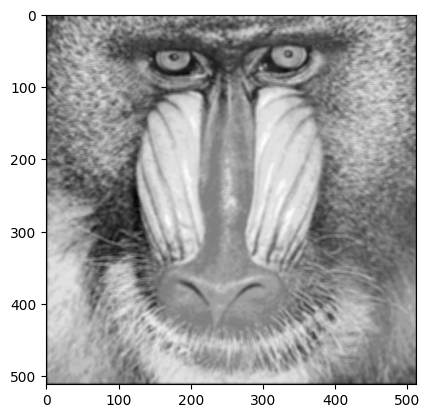

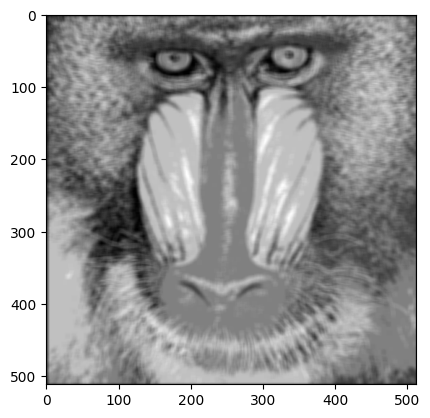

In [93]:
m3 = np.ones((3, 3)) / 9
img_filt = conv2(img, m3)
plt.imshow(img_filt, cmap='grey')
plt.show()

m5 = np.ones((5, 5)) / (5 * 5)
img_filt = conv2(img, m5)
plt.imshow(img_filt, cmap='grey')
plt.show()

m7 = np.ones((7, 7)) / (7*7)
img_filt = conv2(img, m7)
plt.imshow(img_filt, cmap='grey')
plt.show()

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

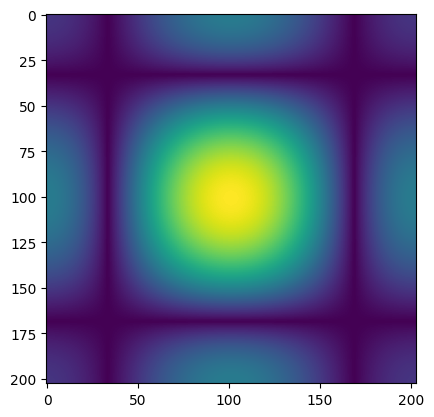

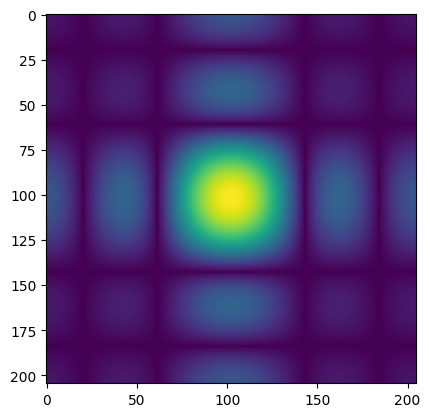

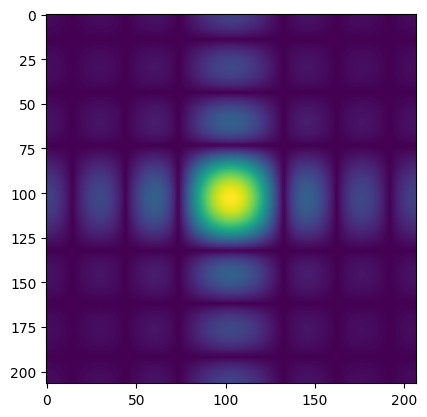

In [94]:
m3ft = fftshift(fft2(imagePad(m3, np.zeros((201, 201)))))
plt.imshow(np.log(1 + np.abs(m3ft)))
plt.show()

m5ft = fftshift(fft2(imagePad(m5, np.zeros((201, 201)))))
plt.imshow(np.log(1 + np.abs(m5ft)))
plt.show()

m7ft = fftshift(fft2(imagePad(m7, np.zeros((201, 201)))))
plt.imshow(np.log(1 + np.abs(m7ft)))
plt.show()

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [1]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below


## Exercise 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [95]:
def subsample(image,factor):
    return image[::factor,::factor]

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

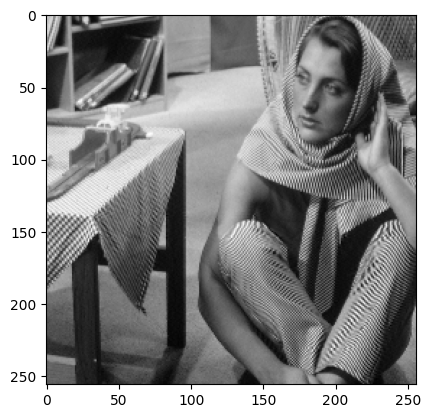

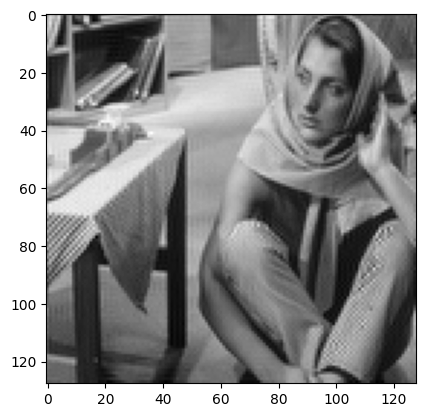

In [102]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below


img = np.asarray(Image.open('img/barbara.png'))
img2 = subsample(img, 2)

img_ft = fftshift(fft2(img2))
img_ft = img_ft * antiAliasingFilter(img_ft.shape[0], img_ft.shape[1])
img_rec = ifft2(ifftshift(img_ft)).real
img_rec_2 = subsample(img_rec, 2)

plt.imshow(img2, cmap='grey')
plt.show()
plt.imshow(img_rec_2, cmap='grey')
plt.show()

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

## Exercise 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images and examine their shape. What difference there are between them?

(512, 512, 3) (512, 512)


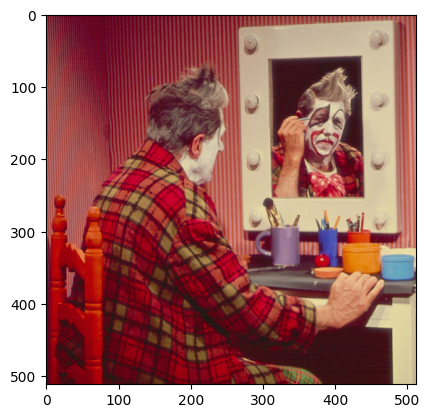

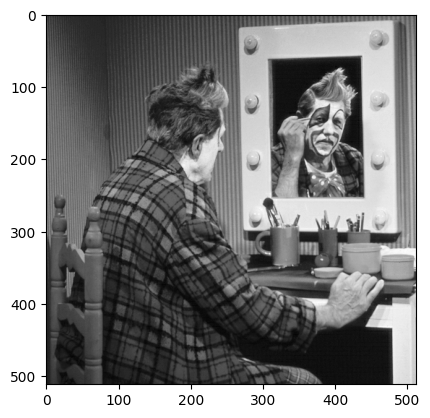

In [106]:
I1 = np.asarray(Image.open('img/clown.bmp'))
I2 = np.asarray(Image.open('img/clown_lumi.bmp'))

print(I1.shape, I2.shape)

plt.imshow(I1)
plt.show()
plt.imshow(I2, cmap='grey')
plt.show()

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

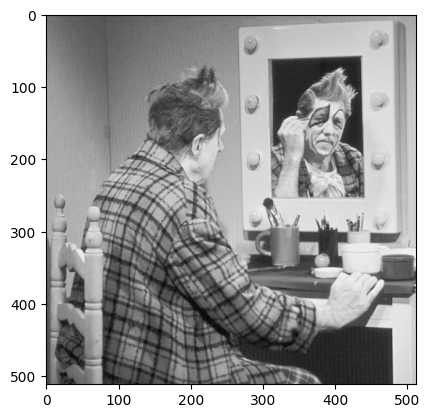

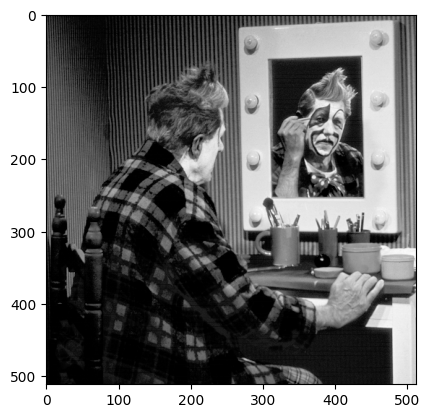

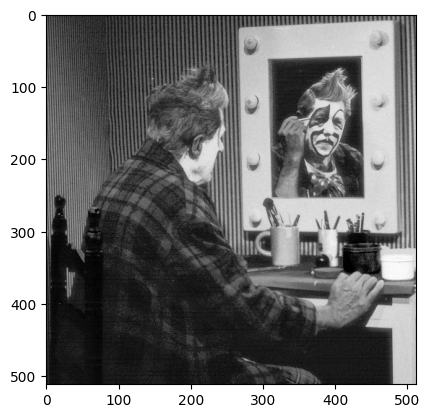

In [107]:
Ir = I1[:, :, 0]
Ig = I1[:, :, 1]
Ib = I1[:, :, 2]

for i in [Ir, Ig, Ib]:
    plt.imshow(i, cmap='grey')
    plt.show()

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

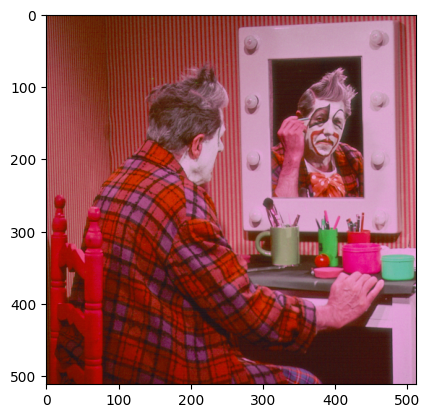

In [108]:
I3 = np.zeros_like(I1)
I3[:, :, 0] = I1[:, :, 0]
I3[:, :, 1] = I1[:, :, 2]
I3[:, :, 2] = I1[:, :, 1]

plt.imshow(I3)
plt.show()

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

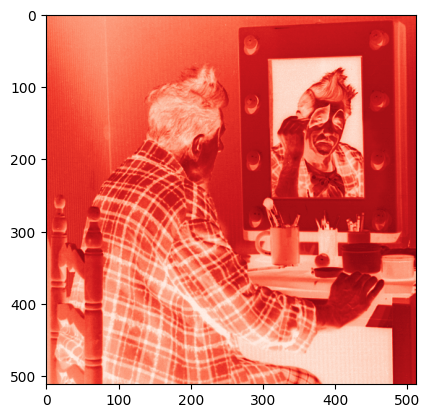

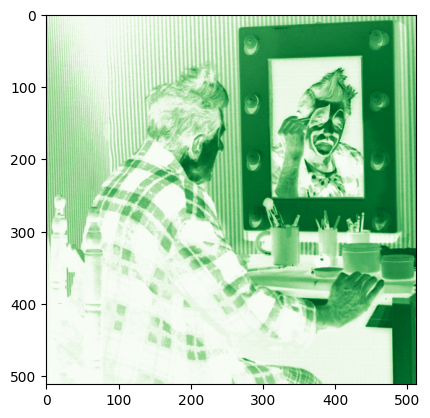

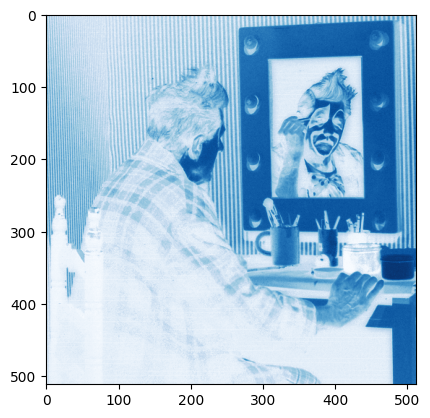

In [118]:
def pcv(I):
    cmaps = ['Reds', 'Greens', 'Blues']
    for i in range(3):
        plt.imshow(I[:, :, i], cmap=cmaps[i])
        plt.show()
        
pcv(I1)